In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
PATH = "/content/drive/MyDrive/LLM Interpretability/Judge/"

BETWEEN_CLASS = ["empathetic_dialogue", "math", "programming", "mmlu"]
WITHIN_CLASS = ["law_and_policy", "negative_feelings", "positive_feelings", "philosophy_and_ethics"]


# ======================== CHANGE THESE
FIGURES_PATH = "/content/drive/MyDrive/LLM Interpretability/Judge/figures_between"
NAME = "Between Class"
DATASET_NAMES = BETWEEN_CLASS

# Analyze together

In [ ]:
DATASET_PATHS = [os.path.join(PATH, f"{name}_with_explanations.csv") for name in DATASET_NAMES]
# Load and concatenate all datasets
df = pd.concat([pd.read_csv(path, encoding="utf-8-sig") for path in DATASET_PATHS], ignore_index=True)

/tmp/ipython-input-3234878977.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(path, encoding="utf-8-sig") for path in DATASET_PATHS], ignore_index=True)
/tmp/ipython-input-3234878977.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(path, encoding="utf-8-sig") for path in DATASET_PATHS], ignore_index=True)
/tmp/ipython-input-3234878977.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(path, encoding="utf-8-sig") for path in DATASET_PATHS], ignore_index=True)
/tmp/ipython-input-3234878977.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(path, encoding="utf-8-sig") for path in DATASET_PATHS], ignore_index=True)


In [ ]:
print(df.shape)
df.head()

(1793022, 11)


,type,layer,class1,class2,Neuron_ID,Contribution,Explanations,empathetic_dialogue,math,programming,mmlu
0,mlp,24,apprehensive,trusting,282,15015042.0,hyperlinks and web addresses,no,NaN,NaN,NaN
1,att,22,apprehensive,trusting,14953,13710207.0,attends to specific significant tokens from sequentially relevant tokens that follow,no,NaN,NaN,NaN
2,mlp,24,apprehensive,trusting,9329,12911080.0,legal terms and phrases related to court cases and legal proceedings,ERROR,NaN,NaN,NaN
3,att,12,apprehensive,trusting,2424,12815097.0,attends from tokens denoting an action or condition to corresponding verbs indicating a reaction or result,no,NaN,NaN,NaN
4,att,7,apprehensive,trusting,10364,11636983.0,attends to instances of the token followed by a comma or period from later tokens marked with specific sequences,no,NaN,NaN,NaN


In [ ]:
df = df[df[DATASET_NAMES].eq('yes').any(axis=1)]
print(df.shape)
df.head()

(54696, 11)


,type,layer,class1,class2,Neuron_ID,Contribution,Explanations,empathetic_dialogue,math,programming,mmlu
23,res,11,embarrassed,trusting,3151,6991898.0,concepts related to human emotions and needs for comfort and change,yes,NaN,NaN,NaN
75,att,8,embarrassed,furious,8042,2354466.0,attends to emotional-related tokens from distress-related tokens,yes,NaN,NaN,NaN
227,att,22,anxious,terrified,2160,359991.0,"attends to instances of ""fear"" from tokens that represent a neutral or contrasting state",yes,NaN,NaN,NaN
250,att,22,angry,furious,2171,281936.0,"attends to contexts involving emotions or states, like feelings of animosity or frustration, from contexts related to actions or behaviors",yes,NaN,NaN,NaN
328,att,22,joyful,proud,12346,143450.0,attends to the tokens related to happiness from tokens that convey positive sentiments or wishes,yes,NaN,NaN,NaN


In [ ]:
df.to_csv(os.path.join(PATH, NAME + "_yes.csv"), index=False)

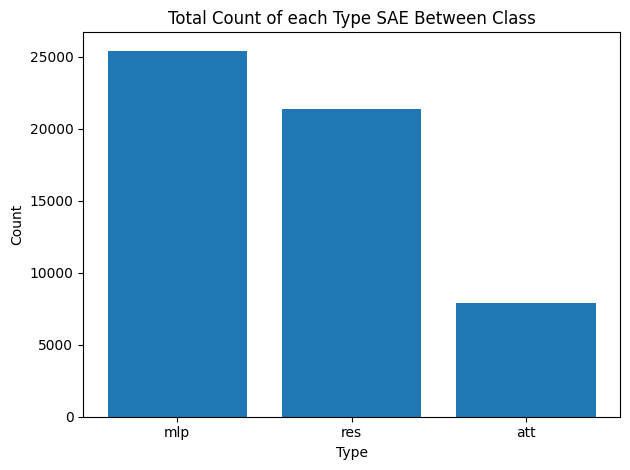

In [ ]:
counts = df["type"].value_counts()

plt.figure()
plt.bar(counts.index, counts.values)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title(f"Total Count of each Type SAE {NAME}")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, NAME + "_total_count_each_type_sae"))
plt.show()

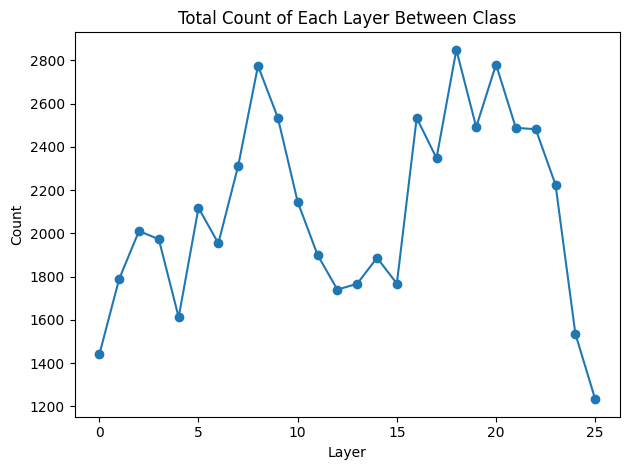

In [ ]:

# Compute counts of each layer and sort by layer number
layer_counts = df['layer'].value_counts().sort_index()

# Plot line chart
plt.figure()
plt.plot(layer_counts.index, layer_counts.values, marker='o')
plt.xlabel('Layer')
plt.ylabel('Count')
plt.title(f'Total Count of Each Layer {NAME}')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, NAME + "_lineplot_count_on_each_layer"))
plt.show()

# Specific dataset

In [ ]:
# ======= CHANGE NUMBER
number = 3

df = pd.read_csv(os.path.join(PATH, f"{DATASET_NAMES[number]}_with_explanations.csv"))
last_col_name = df.columns[-1]
print(DATASET_NAMES[number], "\n")
df.head()

mmlu 



/tmp/ipython-input-1253703115.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(PATH, f"{DATASET_NAMES[number]}_with_explanations.csv"))


,type,layer,class1,class2,Neuron_ID,Contribution,Explanations,mmlu
0,mlp,7,high_school_european_history,high_school_world_history,6117,652151696.0,topics related to nutrition and health measurements,no
1,mlp,23,high_school_european_history,high_school_world_history,10184,598321647.0,mathematical or analytical expressions related to derivatives and functions,no
2,mlp,24,high_school_european_history,high_school_world_history,282,516972456.0,hyperlinks and web addresses,yes
3,mlp,24,high_school_european_history,high_school_world_history,9329,507061800.0,legal terms and phrases related to court cases and legal proceedings,yes
4,res,1,high_school_european_history,high_school_world_history,12054,433595304.0,content related to medical conditions and treatments,no


In [ ]:
df = df[df[last_col_name] == "yes"]
print(df.shape)
df.head()

(35001, 8)


,type,layer,class1,class2,Neuron_ID,Contribution,Explanations,mmlu
2,mlp,24,high_school_european_history,high_school_world_history,282,516972456.0,hyperlinks and web addresses,yes
3,mlp,24,high_school_european_history,high_school_world_history,9329,507061800.0,legal terms and phrases related to court cases and legal proceedings,yes
24,mlp,11,high_school_european_history,high_school_world_history,3341,125872389.0,restrictions or regulations regarding actions and responsibilities in legal or political contexts,yes
26,att,17,high_school_european_history,high_school_us_history,4985,118044603.0,"attends to tokens representing commitment or connection from tokens indicating a particular situation, subject, or understanding",yes
35,mlp,9,high_school_european_history,high_school_world_history,1619,104752960.0,"references to legal or judicial contexts, specifically related to court rulings or actions",yes


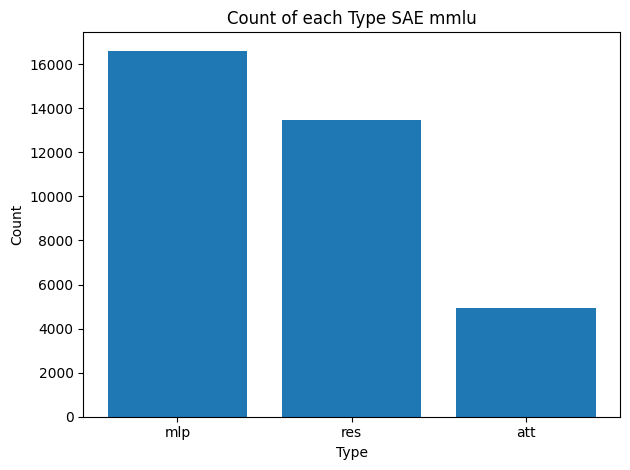

In [ ]:
counts = df["type"].value_counts()

plt.figure()
plt.bar(counts.index, counts.values)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title(f"Count of each Type SAE {last_col_name}")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, last_col_name + "_total_count_each_type_sae"))
plt.show()

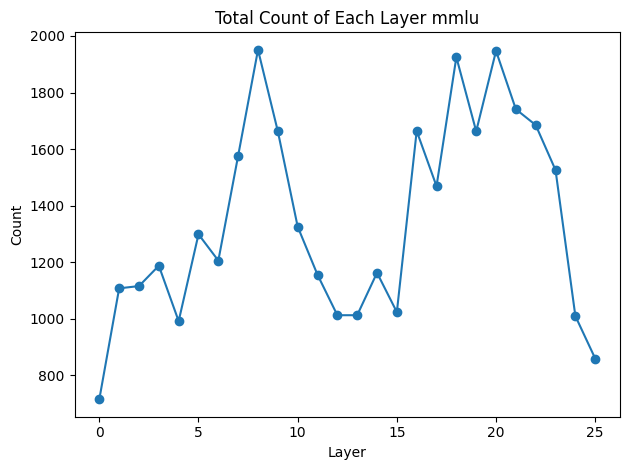

In [ ]:
# Compute counts of each layer and sort by layer number
layer_counts = df['layer'].value_counts().sort_index()

# Plot line chart
plt.figure()
plt.plot(layer_counts.index, layer_counts.values, marker='o')
plt.xlabel('Layer')
plt.ylabel('Count')
plt.title(f'Total Count of Each Layer {last_col_name}')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, last_col_name + "_lineplot_count_on_each_layer"))
plt.show()

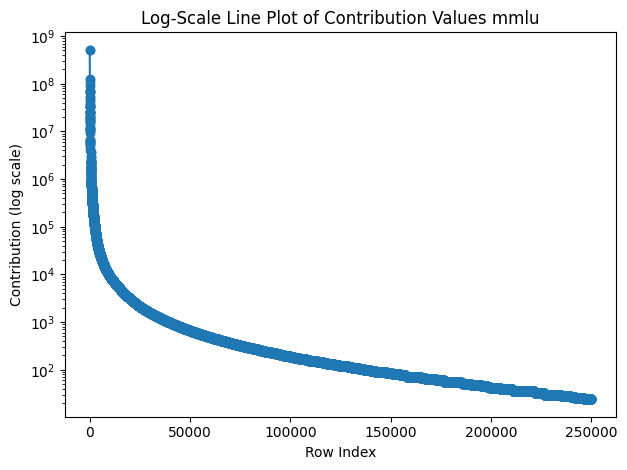

In [ ]:
plt.figure()
plt.plot(df.index, df['Contribution'], marker='o')
plt.yscale('log')
plt.xlabel('Row Index')
plt.ylabel('Contribution (log scale)')
plt.title(f'Log-Scale Line Plot of Contribution Values {last_col_name}')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, last_col_name + "contribution_values"))
plt.show()

# Prepare for steering

In [ ]:
asdfasdfasdf ================================================================================================================================

NameError: name 'asdfasdfasdf' is not defined

In [ ]:
import pandas as pd
import os

In [ ]:
pd.set_option('display.max_colwidth', None)

# BETWEEN_CLASS = ["empathetic_dialogue", "math", "programming", "mmlu"]
WITHIN_CLASS = ["law_and_policy", "negative_feelings", "positive_feelings", "philosophy_and_ethics"]

NAME = WITHIN_CLASS[0]
df = pd.read_csv(os.path.join(PATH, f"{NAME}_with_explanations.csv"))
print(df.shape)
last_col_name = df.columns[-1]
df = df[df[last_col_name] == "yes"]
print(df.shape)
df.head()

(98009, 8)
(2604, 8)


,type,layer,class1,class2,Neuron_ID,Contribution,Explanations,law_and_policy
8,mlp,4,jurisprudence,professional_law,2793,13023760.0,"terms related to legal and regulatory documentation, specifically liability clauses and disclaimers",yes
74,mlp,17,jurisprudence,professional_law,5845,2303596.0,references to legal terms and entities related to jurisdictional matters,yes
113,mlp,23,jurisprudence,professional_law,24,1294808.0,legal terms and phrases related to court proceedings and legal judgments,yes
117,mlp,0,jurisprudence,professional_law,15745,1240943.0,technical jargon associated with inventions and patents,yes
120,mlp,3,jurisprudence,professional_law,11815,1203523.0,phrases related to legal concepts and proceedings,yes


In [ ]:
df = df[df['type'] == 'res']
df.shape

(935, 8)

In [ ]:
top5 = df.nlargest(10, 'Contribution')
bottom5 = df.nsmallest(10, 'Contribution')
combined = pd.concat([top5, bottom5], ignore_index=True)
combined.head(20)

,type,layer,class1,class2,Neuron_ID,Contribution,Explanations,law_and_policy
0,res,13,professional_law,security_studies,15887,711585.0,legal terms and conditions related to software licensing,yes
1,res,18,professional_law,security_studies,7373,510150.0,numerical values or references to legal procedures,yes
2,res,17,professional_law,security_studies,6492,426790.0,phrases related to licensing and copyright information,yes
3,res,21,professional_law,security_studies,3461,348612.0,references to software licensing and copyright information,yes
4,res,6,jurisprudence,professional_law,13460,314604.0,references to safety and regulatory issues in automobile contexts,yes
5,res,17,jurisprudence,professional_law,14856,227369.0,references to legal processes and terms related to court cases,yes
6,res,19,jurisprudence,international_law,3019,101697.0,content related to regulatory compliance and procedural guidelines,yes
7,res,24,professional_law,security_studies,7821,70338.0,technical terms and conditions related to software and programming,yes
8,res,23,jurisprudence,professional_law,7655,50478.0,"terms and expressions related to healthcare, medical requirements, and the complexities of medical legislation",yes
9,res,20,professional_law,international_law,2819,40165.0,phrases related to legal agreements and the principles of good faith and fair dealing,yes


In [ ]:
# ONLY WORKS WITH RES CHAT COMPLETION
import requests

def steer(typ, layer, neuron, prompt, strength=-200):
  return requests.post("https://www.neuronpedia.org/api/steer",
      headers={
        "Content-Type": "application/json"
      },
      json={
        "prompt": prompt,
        "modelId": "gemma-2-2b",
        "features": [
          {
            "modelId": "gemma-2-2b",
            "layer": f"{layer}-gemmascope-{typ}-16k",
            "index": neuron,
            "strength": strength
          }
        ],
        "temperature": 0.5,
        "n_tokens": 64,
        "freq_penalty": 2,
        "seed": 16,
        "strength_multiplier": 1
      }
  ).json()

PROMPT = "What do you think about robbing a bank?"
# PROMPT = "Should I rob a bank?"
# PROMPT = "Can I hack someones account?"
data = steer(typ="res", layer=3, neuron=10914, prompt=PROMPT, strength=-100)
print(data)
print(data["STEERED"])
print("\n")
print(data["DEFAULT"])

{'STEERED': 'What do you think about robbing a bank?\nIf it is the only one that would be true...\n\nHow do you think about the only thing that would be true...\n\nThis is the only way to rob bank?\n\nIf it is the only thing that would be true...\nThis is the only way to rob bank ?\n\n\nThe answer to this question', 'DEFAULT': 'What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to', 'id': 'cmdsz7qr90007ixee0s57s2tz', 'shareUrl': 'https://www.neuronpedia.org/steer/cmdsz7qr90007ixee0s57s2tz', 'limit': '285'}
What do you think about robbing a bank?
If it is the only one that would be true...

How do you think about the only thing that would be true...

This is the only way to rob bank?

If it is the only thing that would be true.

In [ ]:
import tqdm.auto
steered = []

# prompt = "What do you think about robbing a bank?"
# prompt = "What is the good life according to Aristotle?"
prompt = "Should I rob a bank?"
original = []
steered_pos = []
steered_neg = []

for idx, row in tqdm.auto.tqdm(combined.iterrows(), total=len(combined), desc="Steering neurons"):
  typ = row["type"]
  layer = row["layer"]
  neuron = row["Neuron_ID"]

  data_pos = steer(typ=typ, layer=layer, neuron=neuron, prompt=prompt, strength=+150)
  data_neg = steer(typ=typ, layer=layer, neuron=neuron, prompt=prompt, strength=-150)
  original.append(data["DEFAULT"])
  steered_pos.append(data_pos["STEERED"][len(prompt)+1])
  steered_neg.append(data_neg["STEERED"][len(prompt)+1])
  # print(data)

combined["original"] = original
combined["steered_pos"] = steered_pos
combined["steered_neg"] = steered_neg
combined.head(20)

Steering neurons:   0%|          | 0/20 [00:00<?, ?it/s]

,type,layer,class1,class2,Neuron_ID,Contribution,Explanations,law_and_policy,original,steered_pos,steered_neg
0,res,13,professional_law,security_studies,15887,711585.0,legal terms and conditions related to software licensing,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",I,I
1,res,18,professional_law,security_studies,7373,510150.0,numerical values or references to legal procedures,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",N,I
2,res,17,professional_law,security_studies,6492,426790.0,phrases related to licensing and copyright information,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",N,I
3,res,21,professional_law,security_studies,3461,348612.0,references to software licensing and copyright information,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",I,I
4,res,6,jurisprudence,professional_law,13460,314604.0,references to safety and regulatory issues in automobile contexts,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",I,e
5,res,17,jurisprudence,professional_law,14856,227369.0,references to legal processes and terms related to court cases,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",I,I
6,res,19,jurisprudence,international_law,3019,101697.0,content related to regulatory compliance and procedural guidelines,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",I,\n
7,res,24,professional_law,security_studies,7821,70338.0,technical terms and conditions related to software and programming,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",T,I
8,res,23,jurisprudence,professional_law,7655,50478.0,"terms and expressions related to healthcare, medical requirements, and the complexities of medical legislation",yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s so

In [ ]:
combined.head()

,type,layer,class1,class2,Neuron_ID,Contribution,Explanations,law_and_policy,original,steered_pos,steered_neg
0,res,13,professional_law,security_studies,15887,711585.0,legal terms and conditions related to software licensing,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",I,I
1,res,18,professional_law,security_studies,7373,510150.0,numerical values or references to legal procedures,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",N,I
2,res,17,professional_law,security_studies,6492,426790.0,phrases related to licensing and copyright information,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",N,I
3,res,21,professional_law,security_studies,3461,348612.0,references to software licensing and copyright information,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",I,I
4,res,6,jurisprudence,professional_law,13460,314604.0,references to safety and regulatory issues in automobile contexts,yes,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to",I,e


In [ ]:
combined = combined.drop(columns=["class1", "class2", NAME])

In [ ]:
combined.iloc[1]

,1
type,res
layer,18
Neuron_ID,7373
Contribution,510150.0
Explanations,numerical values or references to legal procedures
original,"What do you think about robbing a bank? If you are a teenager, then this would be the first thing that comes to your mind. But if you are an adult, then it’s something that should never cross your mind. Robbing banks is illegal and there is no excuse for doing so.\n\nIf someone has robbed a bank before, they need to"
steered_pos,N
steered_neg,I


In [ ]:
combined.to_csv(os.path.join(PATH, "within/" + f"{NAME}_steered.csv"), index=False)

In [ ]:
for idx, row in combined.iterrows():
  print(row["Explanations"])
  print(row["Steered"])